<a href="https://colab.research.google.com/github/raulink/jupyter-etcmt/blob/master/Pedido2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
entorno = 'colab'

if entorno == 'colab':

  from google.colab import auth
  auth.authenticate_user()

  import gspread
  from google.auth import default
  creds, _ = default()

  gc = gspread.authorize(creds)
  print('conectado')
else:
  import gspread
  gc = gspread.service_account(filename='projects-python-419115-b0c5732cf434.json')
  #gc = gspread.oauth(credentials_filename="key/projects-python-419115-b0c5732cf434.json")
  print('conectado local')

conectado


In [2]:
import pandas as pd
def obtener_hoja_de_calculo(url,hoja)->pd.DataFrame:
    sh = gc.open_by_url(url)
    worksheet = sh.worksheet(hoja)
    data =  worksheet.get_all_values()
    df = pd.DataFrame(data)
    return df



In [17]:
df = obtener_hoja_de_calculo('https://docs.google.com/spreadsheets/d/1jujbeFMzGuSpcK9blAXYZ8La9Aa8Y3-3xiyuDl-3tAE/edit?gid=1095803341','PEDIDO GLOBAL')

In [18]:
df

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,Categoria,Proceso,Ubicación,Tipo de trabajo,Tipo de Bien,TDB/LOCAL,Partida,ID TDB o ID Almacén,ID Cotizado,Descripción del Bien,...,Bs LCA/26,Bs LV/26,Bs TRM/26,Bs. 2026,Bs. Total,Observaciones,Comentarios,Entrega 2024,Entrega 2025,Entrega 2026
1,Repuestos Electromecánicos recurrentes,2,Torres,Reacondionamiento y cambio de Poleas de torre,Repuesto Mecánico,TDB,39800,2-01-00011,10431740,GUARN.DE GOMA 501 485X100/R40,...,"55.865,14","139.662,84",,"2.449.686,21","6.874.204,98",,,1,"401,33","341,13"
2,Repuestos Electromecánicos recurrentes,2,Torres,Reacondionamiento y cambio de Poleas de torre,Repuesto Mecánico,TDB,39800,2-01-00012,10434107,GUARN.DE GOMA 420 422X 93/R34,...,"22.079,21","143.514,85",,"1.278.386,14","2.940.950,51",,,1,"317,23",FALSE
3,Repuestos Electromecánicos recurrentes,2,Torres,Reacondionamiento y cambio de Poleas de torre,Repuesto Mecánico,TDB,39800,2-01-00077,10501989,RRB DIN 625/1- 6310-2RS1-C3GLE VT210 (90% +/-5...,...,"21.600,36","43.200,72",,"838.957,98","2.846.495,44",,,1,"62,07",
4,Repuestos Electromecánicos recurrentes,2,Estaciones,Reacondicionamiento y Cambio de poleas de esta...,Repuesto Mecánico,TDB,39800,2-01-00011,10431740,GUARN.DE GOMA 501 485X100/R40,...,"41.898,85",-,,"1.315.623,95","2.818.396,11",,,1,"401,33",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,Lubricantes Especiales,2,,,Lubricante,TDB,34110,,12157993,ACEITE ISO 220 - MONOGRADO SINTETICO \nMOTORE...,...,,,,"197.243,96","460.235,92",,No se compraran en gestión 2024. Necesario coo...,,1,
649,Repuestos Electromecánicos no recurrentes,,Generador_Auxiliar,Mantenimiento Grupos Electrógenos,Repuesto Eléctrico,LOCAL,39700,2-02-00674,,PRECALENTADOR VOLTAGE ON VOLTAJE 230/240 VATAJ...,...,"0,00","0,00",,"0,00","5.028,60",,"Precio Referencial, Consultar precio",,1,
650,Repuestos Electromecánicos no recurrentes,,Vehiculo,Manto. gral. Cabina,Insumo mecánico,LOCAL,39800,2-01-00225,10765440,ROLDANA PARA APERTURA A/C MODELO E DIÁMETRO 65...,...,"0,00","0,00",,"46.274,80","123.162,16","Se cambia a compra local, Se maneja el mismo ...",,,1,
651,Repuestos Electromecánicos no recurrentes,,Vehiculo,Manto. gral. Cabina,Insumo mecánico,LOCAL,39800,2-01-00654,,TOPE GUIA PARA INSERTO DE CABINA 22.2MM X 17.7MM,...,"0,00","0,00",,"0,00","6.084,40",,Precio referencial,"1.053,05",1,


In [19]:
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
df.sample(3)

,Categoria,Proceso,Ubicación,Tipo de trabajo,Tipo de Bien,TDB/LOCAL,Partida,ID TDB o ID Almacén,ID Cotizado,Descripción del Bien,...,Bs LCA/26,Bs LV/26,Bs TRM/26,Bs. 2026,Bs. Total,Observaciones,Comentarios,Entrega 2024,Entrega 2025,Entrega 2026
635,Lubricantes,13,,,Lubricante,LOCAL,34110,,3-01-00035,80W90 GL-5 PARA ENGRANAJES \nREDUCTORES PRINCI...,...,,,,"312.843,30","913.358,60",,,"640,53",1,
334,Repuestos Electromecánicos no recurrentes,2,Estación,Manto. Hidraulico,Repuesto Hidráulico,TDB,39800,2-04-00053,10661660,MANGUERA AP AN10-2SC L=8000MM DKOL-12/CEL-12,...,"0,00","0,00",,"0,00","10.221,80",,,"414,02","351,92",
340,Repuestos Electromecánicos no recurrentes,2,Estación,Manto. Hidraulico,Repuesto Hidráulico,TDB,39800,2-04-00006,10302502,FILTRO SAUER BR 90 - CORTO ELEM.FILTR. P.B...,...,"0,00","0,00",,"0,00","4.690,48",,,"174,17","148,04",


In [36]:
df.columns

Index(['Categoria', 'Proceso', 'Ubicación', 'Tipo de trabajo', 'Tipo de Bien',
       'TDB/LOCAL', 'Partida', 'ID TDB o ID Almacén', 'ID Cotizado',
       'Descripción del Bien', 'Unid.', 'Q LMO/año', 'Q LPL/año', 'Q LAM/año',
       'Q LR/año', 'Q LN/año', 'Q LAZ/año', 'Q LB/año', 'Q LCE/año',
       'Q LCA/año', 'Q LV/año', 'Q TRM/año', 'Q 2024', 'Q LMO/año2',
       'Q LPL/año3', 'Q LAM/año4', 'Q LR/año5', 'Q LN/año6', 'Q LAZ/año7',
       'Q LB/año8', 'Q LCE/año9', 'Q LCA/año10', 'Q LV/año11', 'Q TRM/año12',
       'Q 2025', 'Q LMO/año3', 'Q LPL/año4', 'Q LAM/año5', 'Q LR/año6',
       'Q LN/año7', 'Q LAZ/año8', 'Q LB/año9', 'Q LCE/año10', 'Q LCA/año11',
       'Q LV/año12', 'Q TRM/año13', 'Q 2026', 'Q Total', '', 'P.U. $us.',
       'P.U. Bs', '', 'Bs LMO/24', 'Bs LPL/24', 'Bs LAM/24', 'Bs LR/24',
       'Bs LN/24', 'Bs LAZ/24', 'Bs LB/24', 'Bs LCE/24', 'Bs LCA/24',
       'Bs LV/24', 'Bs TRM/24', 'Bs. 2024', 'Bs LMO/25', 'Bs LPL/25',
       'Bs LAM/25', 'Bs LR/25', 'Bs LN/25', 'B

In [57]:
df2025 = df[['Categoria', 'Ubicación', 'Tipo de trabajo', 'Tipo de Bien','TDB/LOCAL',
             'Partida', 'ID TDB o ID Almacén', 'ID Cotizado','Descripción del Bien',
             'Unid.','Q LMO/año2','Q LPL/año3', 'Q LAM/año4', 'Q LR/año5', 'Q LN/año6',
             'Q LAZ/año7','Q LB/año8', 'Q LCE/año9', 'Q LCA/año10', 'Q LV/año11',
             'Q TRM/año12','Q 2025', 'Observaciones']]
df2025.sample(3)

,Categoria,Ubicación,Tipo de trabajo,Tipo de Bien,TDB/LOCAL,Partida,ID TDB o ID Almacén,ID Cotizado,Descripción del Bien,Unid.,...,Q LR/año5,Q LN/año6,Q LAZ/año7,Q LB/año8,Q LCE/año9,Q LCA/año10,Q LV/año11,Q TRM/año12,Q 2025,Observaciones
389,Repuestos Electromecánicos no recurrentes,Vehiculo,Manto. Pinza,Repuesto Mecánico,TDB,39800,2-01-00118,10628260,"PLATILLO DE RESORTE SUP., A108-C, RECUB.DE LAM...",Pza,...,,,,,,,,,"5,00",
623,,,,,,,,,,,...,,,,,,,,,,
501,Repuestos Electromecánicos no recurrentes,Torre,Sistema de Horquilla,Repuesto Eléctrico,TDB,39700,2-02-00606,11456353,"HORQUILLA DE SEGUR. DIÁ4,5 L=122 CARGA ESTÁT. ...",Pza,...,,,,,,,,,"0,00",


In [58]:
# prompt: cONVERTIR DE LA COLUMNA Q 2025 LOS VALORES 1.750,00	EN VALORES NUMERICOS FLOAT CON 2 DECIMALES, o sea 1750.00 envuelto en una funcion convertir_numero

def convertir_numero(valor):
  try:
    if pd.isna(valor) or valor == '' or valor == '0':      return 0.00
    # Reemplazar comas por puntos y eliminar espacios
    valor_limpio = valor.replace('.', '')
    valor_limpio = valor_limpio.replace(',', '.')
    # Convertir a número de punto flotante con 2 decimales
    numero = round(float(valor_limpio), 2)
    return numero
  except:
    return valor

# Aplicar la función a la columna 'Q 2025'
df2025['Q 2025'] = df2025['Q 2025'].apply(convertir_numero)


<ipython-input-58-3dd2dd9e84b9>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2025['Q 2025'] = df2025['Q 2025'].apply(convertir_numero)


In [59]:
df2025['Q 2025'].unique()

array([8.770e+02, 5.790e+02, 1.942e+03, 4.710e+02, 4.950e+02, 4.200e+02,
       1.450e+02, 7.840e+02, 0.000e+00, 2.100e+01, 1.148e+03, 3.000e+02,
       1.398e+03, 8.600e+02, 5.980e+02, 5.250e+02, 3.310e+02, 1.800e+01,
       2.130e+02, 2.200e+01, 7.940e+02, 7.600e+01, 8.560e+02, 5.658e+03,
       4.700e+01, 5.400e+01, 8.000e+01, 2.892e+03, 7.400e+01, 1.040e+02,
       2.600e+01, 4.000e+01, 2.260e+02, 1.700e+02, 1.020e+02, 7.000e+00,
       3.750e+02, 6.000e+01, 3.800e+01, 2.800e+01, 3.300e+01, 5.200e+01,
       1.000e+00, 3.340e+02, 1.550e+02, 1.000e+01, 4.340e+02, 1.650e+02,
       3.000e+00, 4.120e+02, 1.500e+01, 5.270e+02, 3.600e+02, 1.530e+02,
       1.750e+03, 2.440e+02, 5.200e+02, 1.600e+01, 2.832e+03, 6.000e+00,
       9.120e+02, 8.500e+01, 4.000e+00, 2.000e+01, 2.000e+00, 1.200e+01,
       4.400e+01, 2.602e+03, 2.950e+02, 8.700e+01, 9.610e+02, 1.700e+01,
       3.100e+01, 5.190e+02, 2.080e+02, 5.300e+01, 2.400e+01, 3.400e+01,
       3.000e+01, 6.300e+01, 4.560e+02, 5.700e+01, 

In [60]:
df2025.dtypes

,0
0,
Categoria,object
Ubicación,object
Tipo de trabajo,object
Tipo de Bien,object
TDB/LOCAL,object
Partida,object
ID TDB o ID Almacén,object
ID Cotizado,object
Descripción del Bien,object


In [61]:
df2025 = df2025[df2025['Q 2025']!=0.0]

In [11]:
%pip install python-docx pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.7 MB/s eta 0:00:00


In [62]:
df2025.columns

df2025 = df2025[['ID Cotizado',
       'Descripción del Bien','Unid.','Q 2025']]
df2025

,ID Cotizado,Descripción del Bien,Unid.,Q 2025
0,10431740,GUARN.DE GOMA 501 485X100/R40,Pza,877.0
1,10434107,GUARN.DE GOMA 420 422X 93/R34,Pza,579.0
2,10501989,RRB DIN 625/1- 6310-2RS1-C3GLE VT210 (90% +/-5...,Pza,1942.0
3,10431740,GUARN.DE GOMA 501 485X100/R40,Pza,471.0
4,10461436,GUARN.DE GOMA 403 403X 93/R38,Pza,495.0
...,...,...,...,...
646,12156706,BQH72 - 102 - KLUBER \n GRASA PARA MOTORES ELÉ...,Pza,2.0
647,12157993,ACEITE ISO 220 - MONOGRADO SINTETICO \nMOTORE...,Pza,4.0
648,,PRECALENTADOR VOLTAGE ON VOLTAJE 230/240 VATAJ...,Pza,1.0
649,10765440,ROLDANA PARA APERTURA A/C MODELO E DIÁMETRO 65...,Pza,18.0


In [64]:

df2025 = df2025.sample(50)

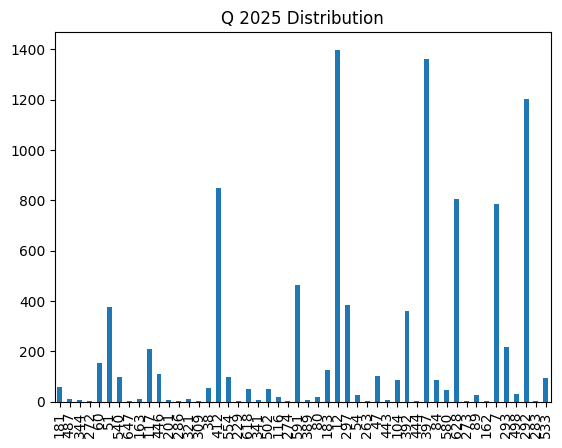

In [67]:
# prompt: Necesito exportar a un archivo word, un texto markdown en python, y una dataframe como tabla y un grafico generado con matplotlib en el word indicado

from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt

document = Document()

# Markdown text
markdown_text = """
# Heading 1
## Heading 2
This is some **bold** and *italic* text.

- List item 1
- List item 2
"""
document.add_paragraph(markdown_text)

# DataFrame as table
table = document.add_table(rows=1, cols=len(df2025.columns))
hdr_cells = table.rows[0].cells
for i, col in enumerate(df2025.columns):
  hdr_cells[i].text = col
for index, row in df2025.iterrows():
  row_cells = table.add_row().cells
  for i, value in enumerate(row):
    row_cells[i].text = str(value)

# Matplotlib chart
plt.figure()
df2025['Q 2025'].plot(kind='bar')
plt.title('Q 2025 Distribution')
plt.savefig('chart.png')
document.add_picture('chart.png', width=Inches(5))

document.save('output.docx')


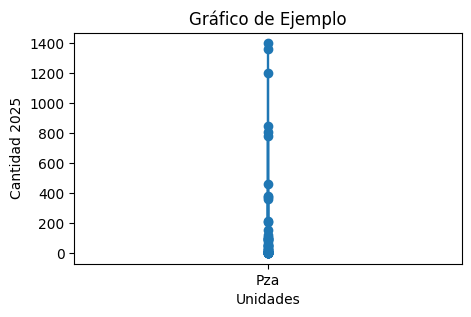

In [66]:
# prompt: Necesito exportar a un archivo word, un texto markup en python, y una dataframe como tabla y un grafico generado con matplotlib en el word indicado

from docx import Document
from docx.shared import Inches
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
import matplotlib.pyplot as plt
from io import BytesIO

# Crear un documento de Word
doc = Document()

# Agregar un texto con formato markdown (ejemplo simple de encabezado)
doc.add_heading('Informe de Análisis', level=1)

# Agregar un párrafo
doc.add_paragraph("Este informe contiene un análisis de datos junto con un gráfico generado a partir de los mismos.")

# Utilizar el DataFrame df2025 que ya tienes
# ... (código para obtener df2025)

# Agregar el DataFrame como tabla en el documento de Word
table = doc.add_table(df2025.shape[0] + 1, df2025.shape[1])

# Agregar encabezados
for j, col in enumerate(df2025.columns):
    table.cell(0, j).text = col

# Agregar el contenido del DataFrame
for i in range(df2025.shape[0]):
    for j in range(df2025.shape[1]):
        cell = table.cell(i + 1, j)
        table.cell(i + 1, j).text = str(df2025.iat[i, j])

# Alinear la tabla al centro
for row in table.rows:
    for cell in row.cells:
        for paragraph in cell.paragraphs:
            paragraph.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER


# Crear un gráfico con matplotlib (ejemplo simple)
plt.figure(figsize=(5, 3))
plt.plot(df2025['Unid.'], df2025['Q 2025'], marker='o')
plt.title('Gráfico de Ejemplo')
plt.xlabel('Unidades')
plt.ylabel('Cantidad 2025')

# Guardar el gráfico en un objeto BytesIO
img_stream = BytesIO()
plt.savefig(img_stream, format='png')
img_stream.seek(0)

# Agregar el gráfico al documento de Word
doc.add_picture(img_stream, width=Inches(5))

# Guardar el documento
doc.save('informe_con_datos.docx')

In [ ]:
# prompt: Ahora generar un excel con la tabla de un dataframe que se exporte a excel. Adicionalmente necesito exportar en una hoja aparte un grafico generado con matplotlib o seaborn como imagen en una hoja de calculo excel

# ... (código previo para obtener df2025)

# Exportar el DataFrame a Excel
df2025.to_excel("datos.xlsx", index=False)

# Crear un gráfico con matplotlib
plt.figure(figsize=(5, 3))
plt.plot(df2025['Unid.'], df2025['Q 2025'], marker='o')
plt.title('Gráfico de Ejemplo')
plt.xlabel('Unidades')
plt.ylabel('Cantidad 2025')

# Guardar el gráfico como imagen
plt.savefig("grafico.png")

# Importar la librería necesaria para trabajar con Excel
import openpyxl

# Cargar el archivo Excel existente
workbook = openpyxl.load_workbook("datos.xlsx")

# Crear una nueva hoja para el gráfico
worksheet_grafico = workbook.create_sheet("Gráfico")

# Insertar la imagen del gráfico en la nueva hoja
img = openpyxl.drawing.image.Image("grafico.png")
worksheet_grafico.add_image(img, "A1")

# Guardar el archivo Excel con el gráfico
workbook.save("datos_con_grafico.xlsx")
